Creating the an ordinal rank column for each sumo wrestler. 
get_ordinal_rank function in sumo.py takes a dataframe and two columns
1. 'rikishi1_sortable_rank' that is a numeric sortable string from 'rikishi1_rank'
2. 'ordinal_rank', an integer column by sorting 'rikishi1_sortable rank' and assigning a integer value
3. Will have to be applied by year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
from seaborn import set_style
from sumo import *

#Add the path to the folder that contains the data. Makes it easier for each of us to use the notebook
#path = "/Users/Kyla/Desktop/ErdosDataScienceWork/Project/"
path = "data/"

df = pd.read_csv(path+str(1983)+'.csv')

for year in range(1984,2020):
    year = str(year)
    dfyear = pd.read_csv(path+year+'.csv')
    df = pd.concat([df, dfyear], axis=0, ignore_index=True)
    #returning a dataframe columns df['rikishi1_sortable_rank'] and df['ordinal_rank'] added
    df = get_ordinal_rank(df)
    #creates 'r1_prior_record' with record prior to the match
    df = prior_record(df)   
    df['time'] = df['year'].astype(str)+df['trny'].astype(str)+df['day'].astype(str)

df = df.iloc[::2]
np.random.seed(500)

In [3]:
print(df.shape)

x= 214788*.10
print(x)

(107394, 25)
21478.800000000003


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

#sklearn.metrics.log_loss(y_true, y_pred, *, normalize=True, sample_weight=None, labels=None)[source]

X = df[['rikishi1_id', 'r1_ord_rank', 'r1_prior_wins', 'r1_prior_losses', 'rikishi2_id', 'r2_ord_rank']]
Y = df['rikishi1_win']

kfold = TimeSeriesSplit(n_splits = 2,
                           test_size = 10739)
## Now we can use this just like a kfold object
LL = []
AS = []
for train_index, test_index in kfold.split(df['time']):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    ## Make the model object
    reg = LogisticRegression()

    ## Fit the model
    reg.fit(X_train, Y_train)

    Y_pred = reg.predict(X_test)
    Y_proba = reg.predict_proba(X_test)

    x = log_loss(Y_test, Y_pred)
    x1 = accuracy_score(Y_test, Y_pred)
    LL.append(x)
    AS.append(x1)

print(LL)
print(AS)


[15.442485263369774, 16.2714993603166]
[0.5715615979141447, 0.548561318558525]


/Users/es/.conda/envs/erdos/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Y_pred

array([0, 0, 0, ..., 1, 0, 0])

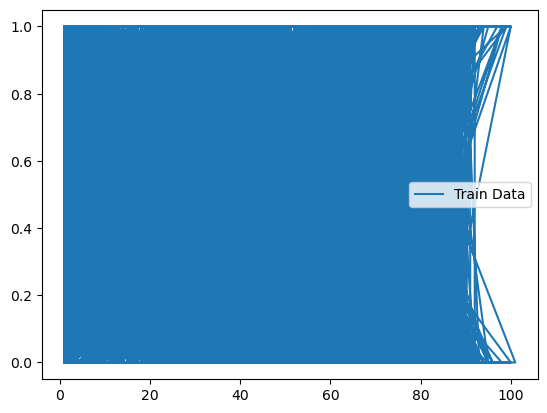

In [ ]:
plt.plot(X_train['r1_ord_rank'], Y_train , label = 'Train Data')
#plt.plot(X_test['r1_ord_rank'], Y_test, label = 'Test Data')
#plt.plot(X_test['r1_ord_rank'], Y_pred, label = 'Linear Trend Forecast')
#plt.legend()
#plt.show()

In [ ]:
df

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,...,rikishi2_win,r1_sort_rank,r1_ord_rank,year,trny,r1_prior_record,r1_prior_wins,r1_prior_losses,prior_record,time
0,10,1983.01,1,1302,J9e,Takamisugi,1-0 (5-10),1,oshidashi,4318,...,0,6091,69,1983,01,1-0,0,0,0-0,1985
1,80,1983.01,2,1302,J9e,Takamisugi,1-1 (5-10),0,yorikiri,1359,...,1,6091,69,1983,01,1-1,1,0,1-0,1986
2,148,1983.01,3,1302,J9e,Takamisugi,1-2 (5-10),0,yorikiri,1350,...,1,6091,69,1983,01,1-2,1,1,1-1,1987
3,196,1983.01,4,1302,J9e,Takamisugi,1-3 (5-10),0,oshidashi,1347,...,1,6091,69,1983,01,1-3,1,2,1-2,1988
4,256,1983.01,5,1302,J9e,Takamisugi,2-3 (5-10),1,yorikiri,4140,...,0,6091,69,1983,01,2-3,1,3,1-3,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214475,4677,2019.09,11,12470,J13w,Kizakiumi,7-4 (8-7),1,hikiotoshi,4980,...,0,6132,78,2019,09,7-4,6,4,6-4,2039
214553,4755,2019.09,12,12470,J13w,Kizakiumi,7-5 (8-7),0,hatakikomi,12370,...,1,6132,78,2019,09,7-5,7,4,7-4,2040
214607,4809,2019.09,13,12470,J13w,Kizakiumi,7-6 (8-7),0,oshidashi,12144,...,1,6132,78,2019,09,7-6,7,5,7-5,2041
214673,4875,2019.09,14,12470,J13w,Kizakiumi,7-7 (8-7),0,hatakikomi,12425,...,1,6132,78,2019,09,7-7,7,6,7-6,2042
